In [365]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [366]:
df = pd.read_csv('E:\\Datasets\\healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [367]:
df1 = pd.DataFrame()

df1['age'],df1['hypertension'],df1['heart_disease'],df1['avg_glucose_level'],df1['bmi'] = df['age'],df['hypertension'],df['heart_disease'],df['avg_glucose_level'],df['bmi'] 
df1.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,67.0,0,1,228.69,36.6
1,61.0,0,0,202.21,NaN
2,80.0,0,1,105.92,32.5
3,49.0,0,0,171.23,34.4
4,79.0,1,0,174.12,24.0


In [368]:
mean = df1['bmi'].mean()
mean

28.893236911794666

In [369]:
import numpy as np
df1['bmi'].replace(np.NaN,mean, inplace = True)

In [370]:
X = df1.values[:,0:]

In [371]:
Scaler = StandardScaler()
Scale = Scaler.fit_transform(X)

In [372]:
Cluster_num = 3 
kmeans = KMeans(init = 'k-means++', n_clusters = Cluster_num, n_init = 12,max_iter = 20)
kmeans.fit(Scale)
labels = kmeans.labels_
labels[0:40]

array([0, 1, 0, 1, 2, 1, 0, 1, 1, 1, 2, 0, 1, 0, 0, 2, 0, 2, 1, 0, 1, 2,
       1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 2, 0, 1, 0, 1, 2, 1, 1])

In [373]:
y_predict = kmeans.fit_predict(Scale)
y_predict

array([2, 0, 2, ..., 0, 0, 0])

In [374]:
df1['Clusters'] = y_predict

In [375]:
k_means_clusters = kmeans.cluster_centers_
k_means_clusters

array([[-0.14685601, -0.32860186, -0.2389468 , -0.08811003, -0.06112565],
       [ 0.78678342,  3.04319637, -0.2389468 ,  0.46250636,  0.51618011],
       [ 1.10399435,  0.45326439,  4.18503199,  0.67737811,  0.16279237]])

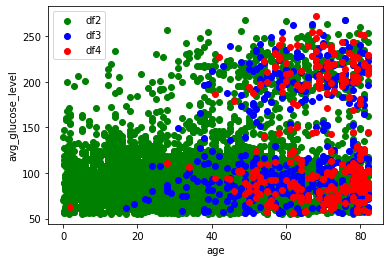

In [376]:
# different clusters on the scatterplot

df2 = df1[df1.Clusters == 0]
df3 = df1[df1.Clusters == 1]
df4 = df1[df1.Clusters == 2]

plt.scatter(df2['age'],df2['avg_glucose_level'],color = 'green', label = 'df2')
plt.scatter(df3['age'],df3['avg_glucose_level'],color = 'blue', label = 'df3')
plt.scatter(df4['age'],df4['avg_glucose_level'],color = 'red', label = 'df4')
plt.xlabel('age')
plt.ylabel('avg_glucose_level')
plt.legend()
plt.show()
           


In [377]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df1[['age']])
df1['age'] = scaler.transform(df[['age']])
scaler.fit(df1[['avg_glucose_level']])
df1['avg_glucose_level'] = scaler.transform(df1[['avg_glucose_level']])
df1.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,Clusters
0,0.816895,0,1,0.801265,36.600000,2
1,0.743652,0,0,0.679023,28.893237,0
2,0.975586,0,1,0.234512,32.500000,2
3,0.597168,0,0,0.536008,34.400000,0
4,0.963379,1,0,0.549349,24.000000,1


In [378]:
df0 = df1[['age','avg_glucose_level']]
df0.head()

,age,avg_glucose_level
0,0.816895,0.801265
1,0.743652,0.679023
2,0.975586,0.234512
3,0.597168,0.536008
4,0.963379,0.549349


In [379]:
Cluster_num = 3 
kmeans = KMeans(init = 'k-means++', n_clusters = Cluster_num, n_init = 12,max_iter = 20)
kmeans.fit(df0[['age','avg_glucose_level']])
labels = kmeans.labels_
labels[0:40]  

array([2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1])

In [380]:
y_predicted = kmeans.fit_predict(df0[['age','avg_glucose_level']])
y_predicted

array([2, 2, 0, ..., 1, 2, 0])

In [381]:
df1['Divide'] = y_predicted
df1

,age,hypertension,heart_disease,avg_glucose_level,bmi,Clusters,Divide
0,0.816895,0,1,0.801265,36.600000,2,2
1,0.743652,0,0,0.679023,28.893237,0,2
2,0.975586,0,1,0.234512,32.500000,2,0
3,0.597168,0,0,0.536008,34.400000,0,2
4,0.963379,1,0,0.549349,24.000000,1,2
...,...,...,...,...,...,...,...
5105,0.975586,1,0,0.132167,28.893237,1,0
5106,0.987793,0,0,0.323516,40.000000,0,0
5107,0.426270,0,0,0.128658,30.600000,0,1
5108,0.621582,0,0,0.513203,25.600000,0,2


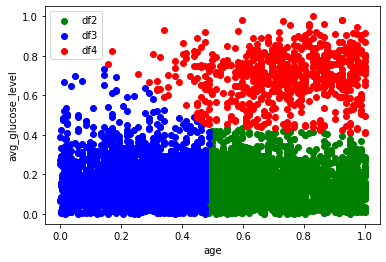

In [382]:
df2 = df1[df1.Divide == 0]
df3 = df1[df1.Divide == 1]
df4 = df1[df1.Divide == 2]

plt.scatter(df2['age'],df2['avg_glucose_level'],color = 'green', label = 'df2')
plt.scatter(df3['age'],df3['avg_glucose_level'],color = 'blue', label = 'df3')
plt.scatter(df4['age'],df4['avg_glucose_level'],color = 'red', label = 'df4')
plt.xlabel('age')
plt.ylabel('avg_glucose_level')
plt.legend()
plt.show()